In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from __future__ import division
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("../Deep_Learning/fer2013.csv",sep=" ",skiprows=[0,1],header=None)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df=df[:28709]

In [4]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,"0,151",150,147,155,148,133,111,140,170,174,...,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,"184,Training"
1,"2,231",212,156,164,174,138,161,173,182,200,...,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,"152,Training"
2,"4,24",32,36,30,32,23,19,20,30,41,...,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,"142,Training"
3,"6,4",0,0,0,0,0,0,0,0,0,...,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,"30,Training"
4,"2,55",55,55,55,55,54,60,68,54,85,...,90.0,83.0,77.0,53.0,37.0,34.0,30.0,34.0,30.0,"57,Training"
5,"4,20",17,19,21,25,38,42,42,46,54,...,29.0,36.0,68.0,91.0,85.0,93.0,97.0,99.0,107.0,"118,Training"
6,"3,77",78,79,79,78,75,60,55,47,48,...,126.0,124.0,139.0,150.0,179.0,180.0,175.0,125.0,67.0,"68,Training"
7,"3,85",84,90,121,101,102,133,153,153,169,...,132.0,151.0,111.0,106.0,102.0,99.0,89.0,58.0,73.0,"84,Training"
8,"2,255",254,255,254,254,179,122,107,95,124,...,160.0,176.0,188.0,251.0,252.0,253.0,253.0,254.0,255.0,"255,Training"
9,"0,30",24,21,23,25,25,49,67,84,103,...,92.0,106.0,111.0,148.0,137.0,176.0,174.0,172.0,173.0,"173,Training"


In [5]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
28699,"4,11",10,12,13,9,11,10,11,11,10,...,39.0,30.0,12.0,9.0,10.0,10.0,13.0,12.0,14.0,"16,Training"
28700,"2,34",42,47,34,53,41,33,39,42,38,...,214.0,217.0,221.0,224.0,224.0,223.0,220.0,233.0,149.0,"44,Training"
28701,"0,196",194,188,177,156,124,81,60,65,64,...,30.0,31.0,28.0,24.0,32.0,34.0,34.0,63.0,97.0,"90,Training"
28702,"5,255",255,255,255,255,255,255,203,145,147,...,92.0,130.0,163.0,169.0,171.0,176.0,178.0,174.0,173.0,"171,Training"
28703,"2,84",85,85,85,85,85,85,85,86,86,...,35.0,34.0,35.0,36.0,40.0,27.0,125.0,231.0,215.0,"200,Training"
28704,"0,114",112,113,113,111,111,112,113,115,113,...,83.0,94.0,107.0,120.0,141.0,144.0,132.0,129.0,182.0,"222,Training"
28705,"4,74",81,87,89,95,100,98,93,105,120,...,211.0,214.0,211.0,209.0,200.0,195.0,192.0,188.0,187.0,"187,Training"
28706,"0,222",227,203,90,86,90,84,77,94,87,...,136.0,139.0,141.0,145.0,137.0,139.0,136.0,136.0,136.0,"134,Training"
28707,"4,195",199,205,206,205,203,206,209,208,210,...,112.0,93.0,67.0,34.0,6.0,7.0,3.0,6.0,15.0,"38,Training"
28708,"0,254",254,254,254,254,249,255,160,2,58,...,90.0,92.0,99.0,84.0,22.0,0.0,0.0,42.0,129.0,"180,PublicTest"


In [6]:
df['Label']=df[0].apply(lambda x : str(x).split(',')[0])
df[0]=df[0].apply(lambda x : str(x).split(',')[1])
df[2303]=df[2303].apply(lambda x : str(x).split(',')[0])

In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Label
0,151,150,147,155,148,133,111,140,170,174,...,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184,0
1,231,212,156,164,174,138,161,173,182,200,...,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152,2
2,24,32,36,30,32,23,19,20,30,41,...,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142,4
3,4,0,0,0,0,0,0,0,0,0,...,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30,6
4,55,55,55,55,55,54,60,68,54,85,...,83.0,77.0,53.0,37.0,34.0,30.0,34.0,30.0,57,2


In [8]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [9]:
df=df.apply(lambda x : pd.to_numeric(x),axis=0 )

In [10]:
df['Label'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [11]:
df['Label'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: Label, dtype: int64

In [12]:
list_columns=list(df.columns)
list_predictors=list_columns
list_predictors.remove('Label')

In [13]:
X=df[list_predictors].get_values()
Y=df['Label'].get_values()

In [14]:
X=StandardScaler().fit_transform(X)

In [15]:
pca=PCA(n_components=300).fit(X,)
cum_var=pca.explained_variance_ratio_.sum()
print(cum_var)

0.9546871068243531


In [16]:
X=pca.transform(X)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y)

** We are training an ANN with one hidden layer and 300 hidden nodes on this data **

** Activation function is sigmoid **

In [18]:
N_train=X_train.shape[0]
D=X_train.shape[1]
M=300
K=len(np.unique(Y_train))
N_test=X_test.shape[0]

In [19]:
W=np.random.randn(D,M)
b=np.random.randn(1,M)
V=np.random.randn(M,K)
c=np.random.randn(1,K)

In [20]:
#Initialising the indicator matrix for Y
T_train=np.zeros((N_train,K))
for i in np.arange(len(Y_train)):
    T_train[i,Y_train[i]]=1
T_test=np.zeros((N_test,K))
for i in np.arange(len(Y_test)):
    T_test[i,Y_test[i]]=1

In [21]:
# defining loss function
def neg_log_loss(indicator,Probability):
    return(-np.log((indicator*Probability).sum(axis=1)).mean())
    

In [22]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))
sigmoid=np.vectorize(sigmoid)

In [23]:
# forward pass
def forward_propagation(W,b,V,c,X):
    Z=sigmoid(X.dot(W)+b)
    A=Z.dot(V)+c
    probability=np.exp(A)/((np.exp(A)).sum(axis=1,keepdims=True))
    return(Z,probability)

In [24]:
list_train_accuracy=[]
list_test_accuracy=[]
list_train_loss=[]
list_test_loss=[]
#learning rate
alpha=1e-5
reg=0
for i in np.arange(1000):
    Z,P_ytrain=forward_propagation(W,b,V,c,X_train)
    Z_test,P_ytest=forward_propagation(W,b,V,c,X_test)
    pred_train=np.argmax(P_ytrain,axis=1)
    pred_test=np.argmax(P_ytest,axis=1)
    train_accuracy=((Y_train==pred_train).mean())
    test_accuracy=((Y_test==pred_test).mean())
    train_loss=neg_log_loss(T_train,P_ytrain)
    test_loss=neg_log_loss(T_test,P_ytest)
    # weight updation
    c_delta=(P_ytrain-T_train).sum(axis=0)# Normal gradient descent
    V_delta=np.transpose(Z).dot(P_ytrain-T_train)#Normal gradient descent
    Loss=(P_ytrain-T_train).dot(np.transpose(V))*(Z*(1-Z)) #Normal gradient descent
    b_delta=Loss.sum(axis=0)#Normal gradient descent
    W_delta=np.transpose(X_train).dot(Loss)#Normal gradient descent
    #W_delta=np.zeros((D,M))
    #for i in np.arange(len(Y_train)):
        #L=((V*(P_ytrain[i,:]-T_train[i,:])).sum(axis=1).reshape(1,M))*((Z[i]*(1-Z[i])).reshape(1,M))
        #W_delta += (np.transpose(X_train[i]).reshape(D,1)).dot(L)
    c=c-alpha*(c_delta)+reg*(c)
    V=V-alpha*(V_delta)+reg*(V)
    b=b-alpha*(b_delta)+reg*(b)
    W=W-alpha*(W_delta)+reg*(W)
    list_train_accuracy.append(train_accuracy)
    list_test_accuracy.append(test_accuracy)
    list_train_loss.append(train_loss)
    list_test_loss.append(test_loss)
    print(train_loss)

16.525937602398916
11.382095821579231
10.104465693388457
9.449883277676937
9.028530289569236
8.722959548636078
8.48809371590525
8.301663388493346
8.149679080938352
8.02236070674397
7.912744547864329
7.816095713861491
7.729311181342133
7.650283208401729
7.577507864674996
7.509869612803774
7.446535718516373
7.3868861174844405
7.330444478993255
7.276825143624365
7.225705158343784
7.176811319817829
7.129911698847249
7.084808167618461
7.041330027156623
6.999329330244479
6.958677766754446
6.919264488982346
6.880994367154831
6.8437863331624476
6.807571604485386
6.772291958805364
6.737898243345297
6.7043485117078045
6.671605200236421
6.639632202715285
6.6083932697464025
6.577851980326778
6.547972475883928
6.518720189354226
6.490062273585823
6.46196775772378
6.4344075829772365
6.407354674245325
6.380784151451054
6.354673691865087
6.329003919650729
6.3037585749449185
6.278924245185747
6.254489699276506
6.230445126703622
6.2067815396086745
6.183490344450563
6.160562984837263
6.137990667099015
6.1

3.130837889592828
3.127477921912753
3.124126189421149
3.1207826629528927
3.117447313785694
3.1141201136373446
3.1108010346609536
3.107490049438118
3.104187130970004
3.1008922526663767
3.0976053883325885
3.0943265121546366
3.0910555986823827
3.087792622811059
3.084537559761243
3.0812903850574456
3.078051074505536
3.074819604169187
3.0715959503455657
3.0683800895404856
3.0651719984432466
3.0619716539013853
3.0587790328955498
3.055594112514739
3.0524168699320993
3.0492472823814984
3.0460853271350787
3.0429309814819683
3.0397842227083496
3.0366450280790227
3.0335133748206338
3.030389240106676
3.0272726010443844
3.0241634346635915
3.0210617179076036
3.017967427626123
3.014880540570214
3.0118010333892835
3.0087288826300123
3.005664064737162
3.0026065560561435
2.9995563328372175
2.9965133712411838
2.9934776473463955
2.990449137156929
2.987427816611717
2.9844136615944947
2.981406647944331
2.978406751466613
2.9754139479442827
2.972428213149177
2.9694495228533153
2.9664778528400064
2.96351317891

2.1788890254139397
2.177549738889879
2.1762129140013475
2.1748785452867523
2.1735466273004023
2.1722171546129085
2.170890121811555
2.1695655235006432
2.1682433543018016
2.1669236088542716
2.1656062818151636
2.1642913678596853
2.162978861681349
2.16166875799215
2.1603610515227274
2.159055737022497
2.1577528092597675
2.156452263021838
2.1551540931150726
2.1538582943649645
2.15256486161618
2.151273789732584
2.1499850735972603
2.148698708112513
2.147414688199858
2.146133008799998
2.1448536648727985
2.143576651397244
2.14230196337139
2.141029595812305
2.1397595437560093
2.138491802257403
2.1372263663901876
2.1359632312467864
2.1347023919382546
2.1334438435941916
2.132187581362637
2.130933600409981
2.12968189592085
2.128432463098009
2.1271852971622462
2.125940393352263
2.124697746924561
2.123457353153319
2.122219207330283
2.1209833047646347
2.119749640782877
2.118518210728706
2.1172890099628825
2.116062033863108
2.114837277823893
2.1136147372564245
2.1123944075884338
2.1111762842640647
2.109

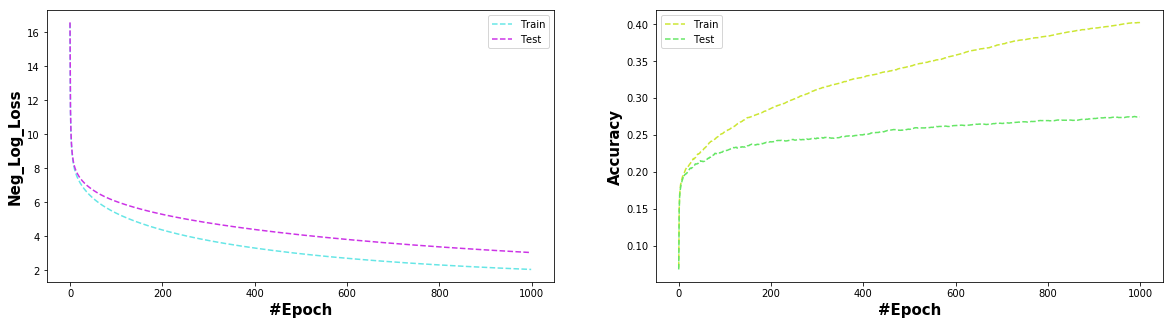

In [28]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
ax1.plot(list_train_loss,color=(0.4,0.9,0.9),linestyle='--',label="Train")
ax1.set_xlabel("#Epoch",fontsize=15,weight='bold')
ax1.set_ylabel("Neg_Log_Loss",fontsize=15,weight='bold')
ax1.plot(list_test_loss,color=(0.8,0.2,0.9),linestyle='--',label="Test")
ax1.legend(loc='best')
ax2=fig.add_subplot(1,2,2)
ax2.plot(list_train_accuracy,color=(0.8,0.9,0.2),linestyle='--',label="Train")
ax2.set_xlabel("#Epoch",fontsize=15,weight='bold')
ax2.set_ylabel("Accuracy",fontsize=15,weight='bold')
ax2.plot(list_test_accuracy,color=(0.4,0.9,0.4),linestyle='--',label="Test")
ax2.legend(loc='best')

The Cost function and Accuracy are reaching stable state. In this network, we considered only hidden layer and three hundred nodes.
This is a very simple network and will not yield good accutacy. Also,Writing complex multilayer networks is difficult in numpy .So, 
we can try Keras and increase the depth of network , more nodes in each hidden layer, different momentum methods to increase accuracy.